## Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [2]:
ABS_PATH = os.path.abspath(os.path.join('D:', '/Data Playground/Academics/Research Project'))

In [3]:
vocabulary = pd.read_csv(ABS_PATH+'/FSD50K/FSD50K.ground_truth/vocabulary.csv', header=None)
print("Number of rows in data =",vocabulary.shape[0])
print("Number of columns in data =",vocabulary.shape[1])
print("\n")
print("**Sample data:**")
vocabulary.head()


Number of rows in data = 200
Number of columns in data = 3


**Sample data:**


,0,1,2
0,0,Accelerating_and_revving_and_vroom,/m/07q2z82
1,1,Accordion,/m/0mkg
2,2,Acoustic_guitar,/m/042v_gx
3,3,Aircraft,/m/0k5j
4,4,Alarm,/m/07pp_mv


In [4]:
ground_truth = pd.read_csv(ABS_PATH+'/FSD50K/FSD50K.ground_truth/dev.csv')
print("Number of audio files =",ground_truth.shape[0])
print("Number of columns in data =",ground_truth.shape[1])
print("\n")
print("**Sample data:**")
ground_truth.head()

Number of audio files = 40966
Number of columns in data = 4


**Sample data:**


,fname,labels,mids,split
0,64760,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
1,16399,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
2,16401,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
3,16402,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
4,16404,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train


In [5]:
ground_truth.groupby(['split']).size()

split
train    36796
val       4170
dtype: int64

In [ ]:
red_labels = {'Alarm', 'Gasp', 'Crying_and_sobbing', 'Hiss', 
              'Screech', 'Shatter', 'Yell', 'Siren', 'Sigh',
              'Screaming', 'Growling', 'Shout'}
f = lambda x: len(set(x["labels"].split(",")).intersection(red_labels))
# red_samples = ground_truth[len(ground_truth.labels.str.split(',').intersection(red_labels))]
# red_samples


red_samples = ground_truth[ground_truth.apply(f, axis=1)>0]
red_samples.groupby('split').size()

## Audio Features

In [11]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

In [7]:
def play(audio):  
    x , sr = librosa.load(audio, sr=44100)
    print(type(x), type(sr))
    print(x.shape, sr)
    ipd.Audio(audio)

In [13]:
def pictures(audio):
    signal , sr = librosa.load(audio, sr=44100)
#     print(x.shape, sr)
    # ipd.Audio(scream_audio1)
    # play(scream_audio2)
    # play(scream_audio3)
    # play(scream_audio4)
    #waveform
    librosa.display.waveplot(signal, sr=sr)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()
    #fft -> spectrum
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft) #contribution of each frequency
    frequency = np.linspace(0, sr, len(magnitude))
    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]
#     power spectrum
    plt.plot(left_frequency, left_magnitude)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()
    #stft -> spectrogram
    n_fft = 2048
    hop_length = 512
    stft = librosa.core.stft(signal, hop_length=hop_length ,n_fft=n_fft)
    spectrogram = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    plt.show()
    #MFCCs
    MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
    log_spectrogram = librosa.amplitude_to_db(MFCCs)
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("MFCC")
    plt.colorbar()
    plt.show()


In [19]:
scream_audio1 = 'D:/Data Playground/Academics/Research Project/FSD50K/FSD50K.dev_audio/40964.wav' #Yell
scream_audio2 = 'D:/Data Playground/Academics/Research Project/FSD50K/FSD50K.dev_audio/333412.wav' #gasp
scream_audio3 = 'D:/Data Playground/Academics/Research Project/FSD50K/FSD50K.dev_audio/381957.wav' #Siren
scream_audio4 = 'D:/Data Playground/Academics/Research Project/FSD50K/FSD50K.dev_audio/254476.wav' #screaming

animal_audio1 = 'D:/Data Playground/Academics/Research Project/FSD50K/FSD50K.dev_audio/236064.wav' #Dog
animal_audio2 = 'D:/Data Playground/Academics/Research Project/FSD50K/FSD50K.dev_audio/402930.wav' #wild animals
animal_audio3 = 'D:/Data Playground/Academics/Research Project/FSD50K/FSD50K.dev_audio/392243.wav' #Cat
animal_audio4 = 'D:/Data Playground/Academics/Research Project/FSD50K/FSD50K.dev_audio/18073.wav' #Live stock

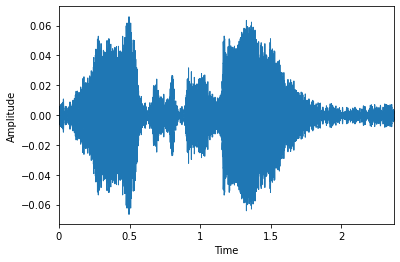

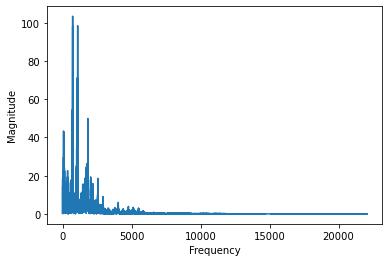

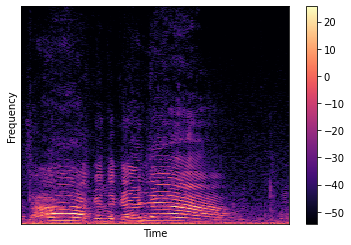

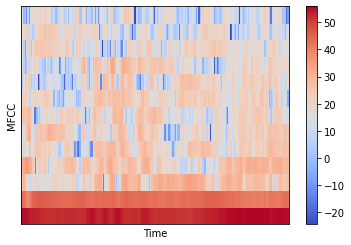

In [14]:
pictures(audio = scream_audio1)

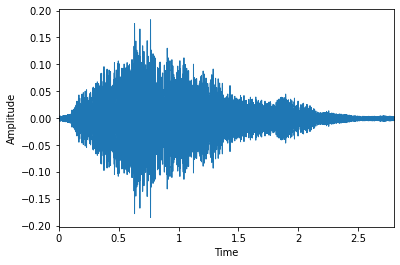

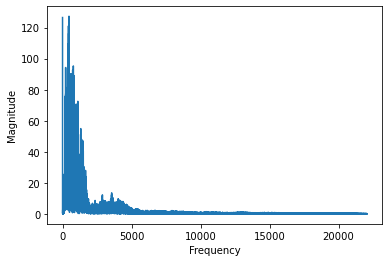

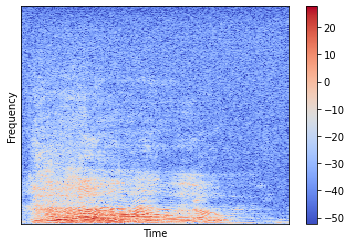

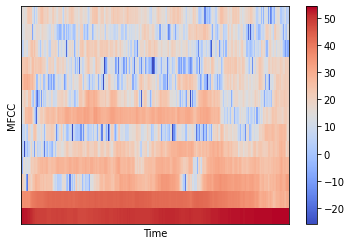

In [15]:
pictures(audio = scream_audio2)

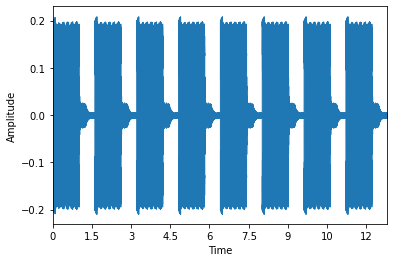

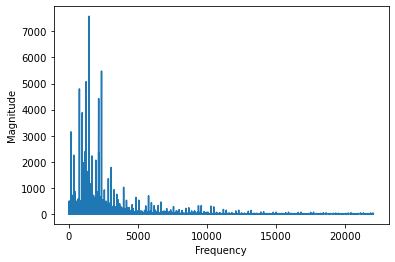

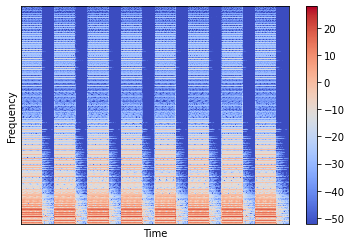

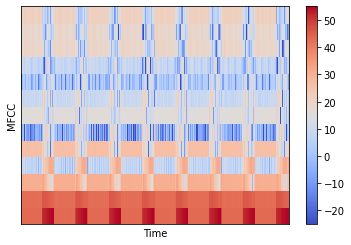

In [16]:
pictures(audio = scream_audio3)

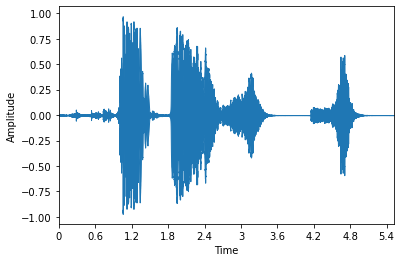

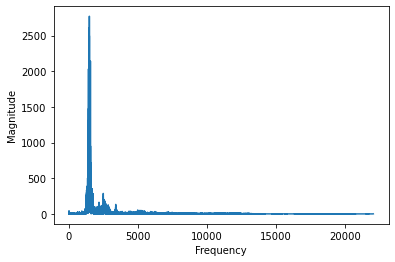

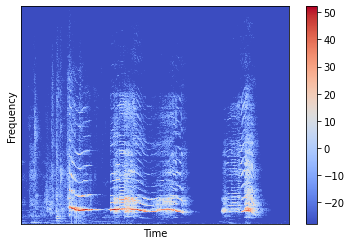

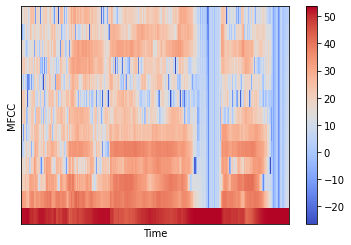

In [17]:
pictures(audio = scream_audio4)

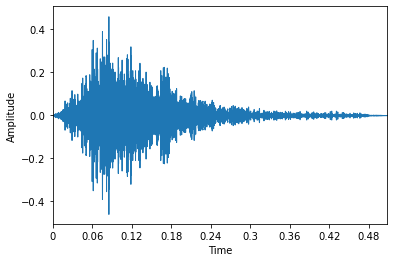

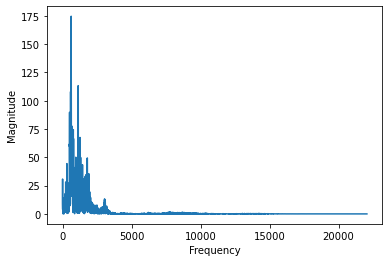

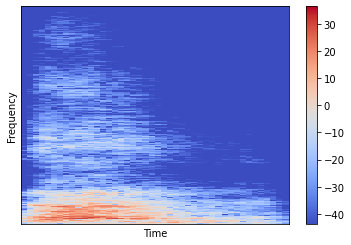

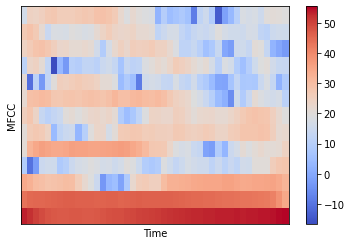

In [20]:
pictures(animal_audio1)

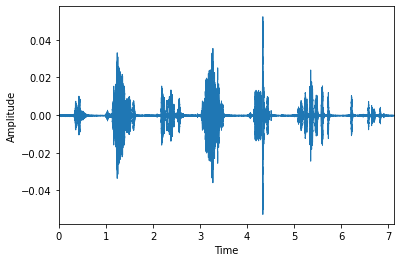

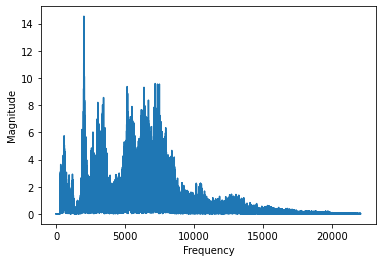

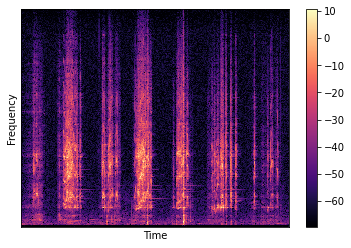

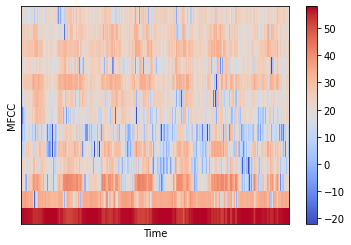

In [21]:
pictures(animal_audio2)

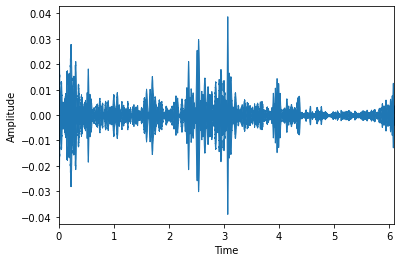

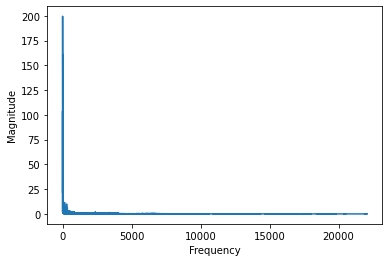

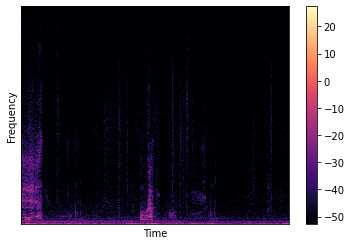

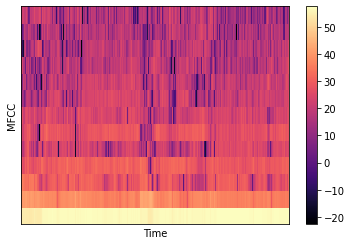

In [22]:
pictures(animal_audio3)

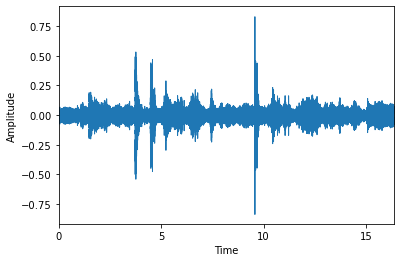

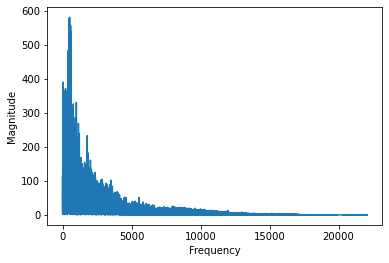

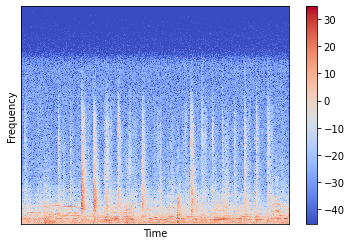

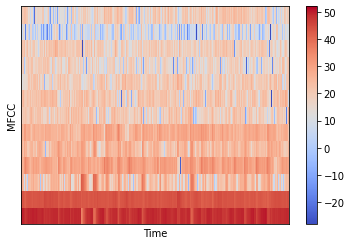

In [23]:
pictures(animal_audio4)

In [30]:
import soundfile as sf

In [21]:


def slice_data(start, end, raw_data,  sample_rate):
    max_ind = len(raw_data) 
    start_ind = min(int(start * sample_rate), max_ind)
    end_ind = min(int(end * sample_rate), max_ind)
    return raw_data[start_ind: end_ind]



In [25]:
animal_audio2 = 'D:/Data Playground/Academics/Research Project/FSD50K/FSD50K.dev_audio/402930.wav'
max_len = 3
start = 0
end =3
signal , sr = librosa.load(animal_audio2, sr=44100)
duration = librosa.get_duration(y=signal, sr=44100)

while end<duration:
    sliced_data = slice_data(start=start, end=end, raw_data=signal, sample_rate=44100)
    start = end
    end = end +max_len
end = duration
start
sliced_data = slice_data(start=start, end=end, raw_data=signal, sample_rate=44100)
a_len = 44100 * max_len
padded_data = librosa.util.pad_center(sliced_data, a_len)

In [31]:
duration = librosa.get_duration(y=padded_data, sr=44100)
duration
padded_data
sf.write(file='D:/Data Playground/Academics/Research Project/super.wav', data=padded_data, samplerate=44100)